In [1]:
# using https://www.alpharithms.com/predicting-stock-prices-with-linear-regression-214618/

import numpy as np # linear algebra
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import matplotlib.pyplot as plt

In [19]:
df=pd.read_csv('data/NFLX.csv')
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-02-05,262.000000,267.899994,250.029999,254.259995,254.259995,11896100
1,2018-02-06,247.699997,266.700012,245.000000,265.720001,265.720001,12595800
2,2018-02-07,266.579987,272.450012,264.329987,264.559998,264.559998,8981500
3,2018-02-08,267.079987,267.619995,250.000000,250.100006,250.100006,9306700
4,2018-02-09,253.850006,255.800003,236.110001,249.470001,249.470001,16906900


In [3]:
df.set_index(pd.DatetimeIndex(df['Date']), inplace=True)

df = df[['Adj Close']]

df

,Adj Close
Date,
2018-02-05,254.259995
2018-02-06,265.720001
2018-02-07,264.559998
2018-02-08,250.100006
2018-02-09,249.470001
...,...
2022-01-31,427.140015
2022-02-01,457.130005
2022-02-02,429.480011


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1009 entries, 2018-02-05 to 2022-02-04
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Adj Close  1009 non-null   float64
dtypes: float64(1)
memory usage: 15.8 KB


In [5]:
import pandas_ta

In [6]:
df.ta.ema(close='Adj Close', length=10, append=True)

Date
2018-02-05           NaN
2018-02-06           NaN
2018-02-07           NaN
2018-02-08           NaN
2018-02-09           NaN
                 ...    
2022-01-31    425.626075
2022-02-01    431.354062
2022-02-02    431.013326
2022-02-03    426.392722
2022-02-04    423.443139
Name: EMA_10, Length: 1009, dtype: float64

In [7]:
df.head()

,Adj Close,EMA_10
Date,,
2018-02-05,254.259995,NaN
2018-02-06,265.720001,NaN
2018-02-07,264.559998,NaN
2018-02-08,250.100006,NaN
2018-02-09,249.470001,NaN


In [8]:
df = df.iloc[10:]

In [9]:
df.head(10)

,Adj Close,EMA_10
Date,,
2018-02-20,278.549988,265.427996
2018-02-21,281.040009,268.266544
2018-02-22,278.140015,270.061721
2018-02-23,285.929993,272.946861
2018-02-26,294.160004,276.803796
2018-02-27,290.609985,279.314012
2018-02-28,291.380005,281.507829
2018-03-01,290.390015,283.122772
2018-03-02,301.049988,286.382266


In [10]:
X_train, X_test, y_train, y_test = train_test_split(df[['Adj Close']], df[['EMA_10']], test_size=.2)

In [11]:
X_test.head()

,Adj Close
Date,
2021-08-18,521.869995
2019-11-01,286.809998
2018-11-14,286.730011
2020-11-09,470.500000
2019-03-27,353.369995


In [12]:
y_test.head()

,EMA_10
Date,
2021-08-18,517.872634
2019-11-01,282.483451
2018-11-14,303.123837
2020-11-09,495.058281
2019-03-27,361.816468


In [13]:
X_train.head()

,Adj Close
Date,
2019-05-16,359.309998
2020-08-14,482.679993
2021-07-13,540.679993
2018-10-05,351.350006
2020-09-03,525.750000


In [14]:
model = LinearRegression()

In [15]:
model.fit(X_train, y_train)

LinearRegression()

In [16]:
y_pred = model.predict(X_test)

In [17]:
print("Model Coefficients:", model.coef_)
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred))
print("Coefficient of Determination:", r2_score(y_test, y_pred))

Model Coefficients: [[0.9860468]]
Mean Absolute Error: 11.507698761792385
Coefficient of Determination: 0.974218771739743


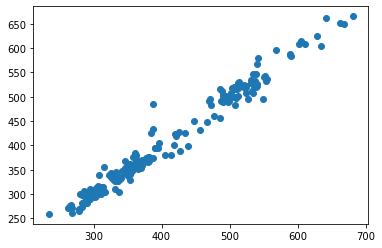

In [18]:
# np.polyfit(X_train, y_train, 1)
plt.plot(X_test, y_test, 'o')
# m, b = np.polyfit(X_train, y_train, 1)